<a href="https://colab.research.google.com/github/Pambao/MIP/blob/main/Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1:
Implement the Otsu algorithm and apply it for lung segmentation in chest X-rays
(Chest_UoC_paxx.img, these are raw images with the size of 440x440, 16-unsigned bit pixels).
Apply it for lung segmentation in images Chest_HoanMy_xxx. Comment on results.

In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.2MB/s 


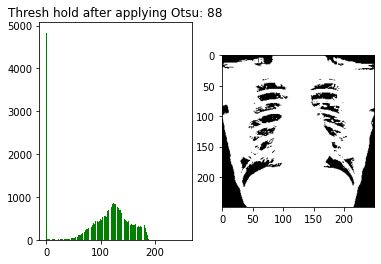

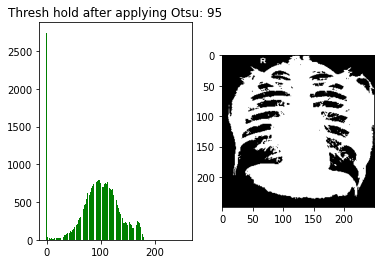

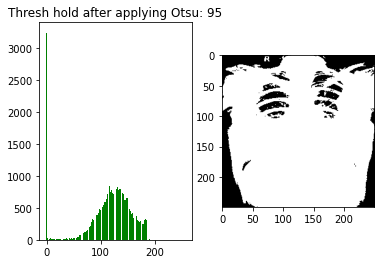

In [11]:
from PIL import Image

import math
import matplotlib.pyplot as plt
import pydicom as dcm

def solution3_1():

    paths = [
        'drive/MyDrive/MIP Resource/Chest_HoanMy_96.jpg',
        'drive/MyDrive/MIP Resource/Chest_HoanMy_97.jpg',
        'drive/MyDrive/MIP Resource/Chest_HoanMy_98.jpg',
    ]

    for path in paths:
        image = Image.open(path)
        image = image.convert('L')
        image = image.resize((250, 250))
        size = image.size
        total_pixel = size[0] * size[1]
        division = range(256)

        histogram = image.histogram()
        thresh_hold = 0
        var_max = 0
        p1 = 0

        plt.subplot(1,2, 1)
        plt.bar(division, histogram, color='green')

        for i in range(256):
            p1 += histogram[i] / total_pixel
            p2 = 1 - p1

            if p1 == 0:
                continue
                
            mean1 = 0
            mean2 = 0
            for x in range(i + 1):
                mean1 += (x * histogram[x] / total_pixel) / p1

            for x in range(i + 1, 256):
                mean2 += (x * histogram[x] / total_pixel) / p2

            var = p1 * p2 * math.pow((mean1 - mean2), 2)

            if var > var_max:
                var_max = var
                thresh_hold = i

        plt.title(f'Thresh hold after applying Otsu: {thresh_hold}')

        for y in range(size[1]):
            for x in range(size[0]):
                val = 0 if image.getpixel((x, y)) < thresh_hold else 255
                image.putpixel((x, y), val)

        plt.subplot(1,2, 2)
        plt.imshow(image, cmap='gray')
        plt.show()

solution3_1()

The result of images after separating the image into 2 classes using Otsu algorithm
can barely highlight the lung region from other parts. The algorithm find the thresh hold
such that the difference of the mean between 2 classes is maximize, then the value of the
pixels in 2 classes are the most distinguished.